In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
dataset=pd.read_csv("Clean_Data.csv")
#dataset = dataset[1:1000]
dataset.head()
dataset.shape

(226331, 33)

In [2]:
#Find percentage of flights delayed grouped by years.
percentFlightsDelayed = (dataset.groupby(["Year"])["Arr Del15"].mean()/dataset.groupby(["Year"])["Arr Flights"].mean())*100
dfOfYearAndMean = pd.DataFrame({'Year':percentFlightsDelayed.index, 'Mean':percentFlightsDelayed.values})
dfOfYearAndMean.head()

,Year,Mean
0,2003,17.138512
1,2004,19.937399
2,2005,20.531412
3,2006,22.620479
4,2007,24.197413


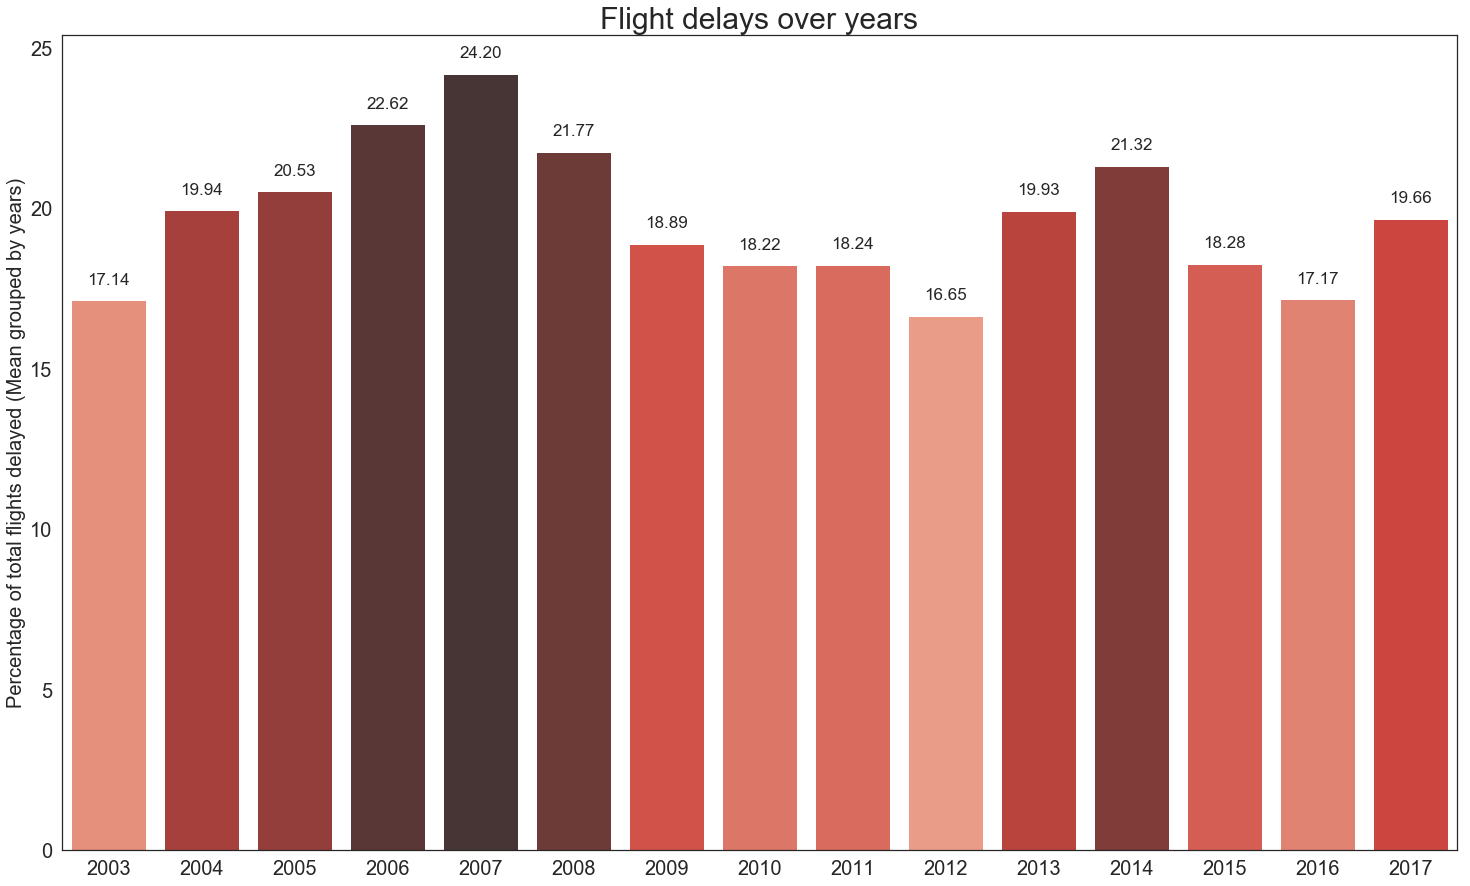

In [3]:
import matplotlib.pyplot as plt
#To show plot bigger
plt.rcParams['figure.figsize'] = [25, 15]
#axis tick label sizes
rc={'xtick.labelsize': 20, 'ytick.labelsize': 20}
sns.set(rc=rc)
sns.set_style("white")
pal = sns.color_palette("Reds_d", len(dfOfYearAndMean["Mean"]))
rank = dfOfYearAndMean["Mean"].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
chart = sns.barplot(x="Year", y="Mean", data=dfOfYearAndMean, palette=np.array(pal[::-1])[rank])
chart.set_ylabel('Percentage of total flights delayed (Mean grouped by years)', fontsize=20)
chart.set_xlabel("")
chart.set_title("Flight delays over years", fontsize=30)
cnt = 0

#This code will insert labels on the top of bars in our bar chart
#This code is used from one of the answers at Stackoverflow.
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height+0.5,
            '{:1.2f}'.format(dfOfYearAndMean["Mean"][cnt]),
            ha="center", fontsize=17) 
    cnt = cnt + 1

plt.show()